In [37]:
X = [1,2,3,4,5]

In [38]:
Y = [2,4,5,4,5]

In [39]:
# !pip install numpy pandas matplotlib scikit-learn seaborn jupyter

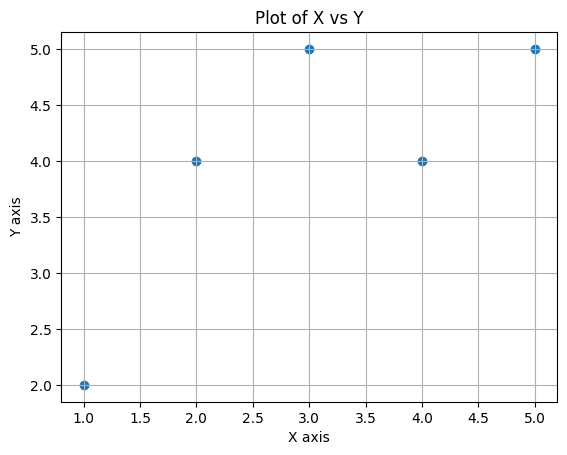

In [40]:
import matplotlib.pyplot as plt
plt.scatter(X, Y)
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.title("Plot of X vs Y")
plt.grid()
plt.show()

In [41]:
mean_x = sum(X) / len(X)
mean_y = sum(Y) / len(Y)

In [42]:
print("The mean of X is:",mean_x,"\nThe mean of Y is:", mean_y)

The mean of X is: 3.0 
The mean of Y is: 4.0


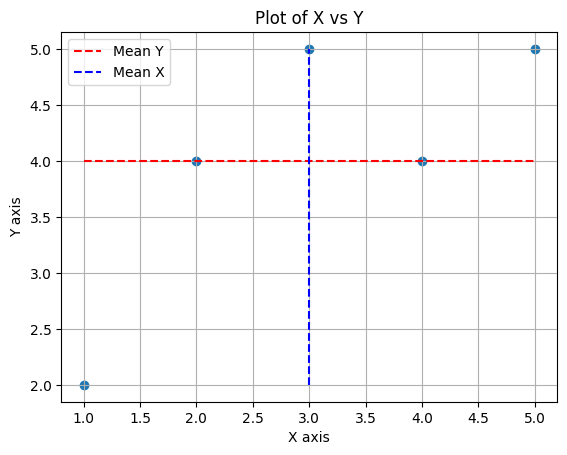

In [43]:
plt.scatter(X, Y)
plt.plot([min(X), max(X)], [mean_y, mean_y], color='red', linestyle='--', label='Mean Y')
plt.plot([mean_x, mean_x], [min(Y), max(Y)], color='blue', linestyle='--', label='Mean X')
plt.legend()
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.title("Plot of X vs Y")
plt.grid()
plt.show()

   X  Y  X^2  Y^2  X*Y
0  1  2    1    4    2
1  2  4    4   16    8
2  3  5    9   25   15
3  4  4   16   16   16
4  5  5   25   25   25


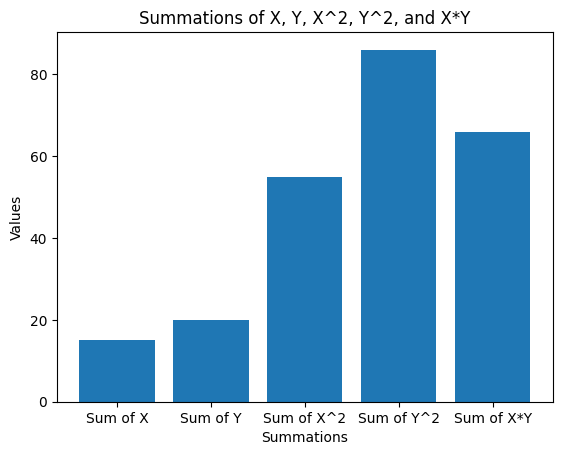

In [44]:
import numpy as np
import pandas as pd

# Calculate the required columns
X_squared = [x**2 for x in X]
Y_squared = [y**2 for y in Y]
X_times_Y = [x * y for x, y in zip(X, Y)]

# Create the table
data = {
    'X': X,
    'Y': Y,
    'X^2': X_squared,
    'Y^2': Y_squared,
    'X*Y': X_times_Y
}

df = pd.DataFrame(data)

# Display the table
print(df)

# Calculate the summations
sums = {
    'Sum of X': sum(X),
    'Sum of Y': sum(Y),
    'Sum of X^2': sum(X_squared),
    'Sum of Y^2': sum(Y_squared),
    'Sum of X*Y': sum(X_times_Y)
}

# Plot the summations
categories = list(sums.keys())
values = list(sums.values())

plt.bar(categories, values)
plt.xlabel("Summations")
plt.ylabel("Values")
plt.title("Summations of X, Y, X^2, Y^2, and X*Y")
plt.show()


### Formulas for Linear Regression

The equation of a straight line is:

\[
Y = mX + c
\]

Where:
- \( m \) is the **slope**
- \( c \) is the **intercept**

#### Slope \( m \):

\[
m = \frac{n\sum XY - \sum X \sum Y}{n\sum X^2 - (\sum X)^2}
\]

#### Intercept \( c \):

\[
c = \frac{\sum Y - m \sum X}{n}
\]


In [45]:
# Compute required sums
n = len(X)
sum_X = sum(X)
sum_Y = sum(Y)
sum_XY = sum(x*y for x, y in zip(X, Y))
sum_X_squared = sum(x**2 for x in X)

# Compute slope (m) and intercept (c)
m = (n * sum_XY - sum_X * sum_Y) / (n * sum_X_squared - sum_X**2)
c = (sum_Y - m * sum_X) / n

# Step 4: Print the results
print(f"Slope (m): {m}")
print(f"Intercept (c): {c}")

Slope (m): 0.6
Intercept (c): 2.2


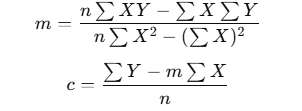

In [46]:
# Manually computing the slope (m) and intercept (c)

n = len(X)                       # n = 9
sum_X = sum(X)                   # 45
sum_Y = sum(Y)                   # 113
sum_XY = sum(x*y for x, y in zip(X, Y))        # 703
sum_X_squared = sum(x**2 for x in X)           # 285

# Now compute slope (m)
numerator = n * sum_XY - sum_X * sum_Y         # 9*703 - 45*113 = 6327 - 5085 = 1242
denominator = n * sum_X_squared - sum_X**2     # 9*285 - 45^2 = 2565 - 2025 = 540
m = numerator / denominator                    # 1242 / 540 = 2.3

# Intercept (c)
c = (sum_Y - m * sum_X) / n                    # (113 - 2.3*45)/9 = (113 - 103.5)/9 = 1.055...

print(f"Slope (m): {m}")
print(f"Intercept (c): {c}")


Slope (m): 0.6
Intercept (c): 2.2


In [47]:
np.polyfit(Y, X, 1)


array([ 1., -1.])

In [48]:
np.polyfit(X, Y, 1)


array([0.6, 2.2])

In [49]:
import os

# Check working directory
print("Current directory:", os.getcwd())

# Check if file exists
print("File exists:", os.path.exists("regression/companies.csv"))


Current directory: b:\Projects\the-ml\regression
File exists: False


In [50]:
companies = pd.read_csv("companies.csv")

In [51]:
companies.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [52]:
X = companies.iloc[:, :-1].values  # Features (all columns except the last)
y = companies.iloc[:, 4].values

companies.head()# Target variable (last column)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [53]:
import seaborn as sns

In [54]:
%matplotlib inline

In [55]:
# sns.heatmap(companies.corr())

In [57]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [58]:
from sklearn.compose import ColumnTransformer

In [59]:
X[:, 3]

array(['New York', 'California', 'Florida', 'New York', 'Florida',
       'New York', 'California', 'Florida', 'New York', 'California',
       'Florida', 'California', 'Florida', 'California', 'Florida',
       'New York', 'California', 'New York', 'Florida', 'New York',
       'California', 'New York', 'Florida', 'Florida', 'New York',
       'California', 'Florida', 'New York', 'Florida', 'New York',
       'Florida', 'New York', 'California', 'Florida', 'California',
       'New York', 'Florida', 'California', 'New York', 'California',
       'California', 'Florida', 'California', 'New York', 'California',
       'New York', 'Florida', 'California', 'New York', 'California',
       'New York', 'California', 'Florida', 'New York', 'Florida',
       'New York', 'California', 'Florida', 'New York', 'California',
       'Florida', 'California', 'Florida', 'California', 'Florida',
       'New York', 'California', 'New York', 'Florida', 'New York',
       'California', 'New York', 'Flori

In [60]:
labelencoder = LabelEncoder()
X[:, 3] = labelencoder.fit_transform(X[:, 3])

In [61]:
X[:, 3]  # Checking the categorical data

array([2, 0, 1, 2, 1, 2, 0, 1, 2, 0, 1, 0, 1, 0, 1, 2, 0, 2, 1, 2, 0, 2,
       1, 1, 2, 0, 1, 2, 1, 2, 1, 2, 0, 1, 0, 2, 1, 0, 2, 0, 0, 1, 0, 2,
       0, 2, 1, 0, 2, 0, 2, 0, 1, 2, 1, 2, 0, 1, 2, 0, 1, 0, 1, 0, 1, 2,
       0, 2, 1, 2, 0, 2, 1, 1, 2, 0, 1, 2, 1, 2, 1, 2, 0, 1, 0, 2, 1, 0,
       2, 0, 0, 1, 0, 2, 0, 2, 1, 0, 2, 0, 2, 0, 1, 2, 1, 2, 0, 1, 2, 0,
       1, 0, 1, 0, 1, 2, 0, 2, 1, 2, 0, 2, 1, 1, 2, 0, 1, 2, 1, 2, 1, 2,
       0, 1, 0, 2, 1, 0, 2, 0, 0, 1, 0, 2, 0, 2, 1, 0, 2, 0, 2, 0, 1, 2,
       1, 2, 0, 1, 2, 0, 1, 0, 1, 0, 1, 2, 0, 2, 1, 2, 0, 2, 1, 1, 2, 0,
       1, 2, 1, 2, 1, 2, 0, 1, 0, 2, 1, 0, 2, 0, 0, 1, 0, 2, 0, 2, 1, 0,
       2, 0, 0, 1, 2, 1, 2, 0, 1, 2, 0, 1, 0, 1, 0, 1, 2, 0, 2, 1, 2, 0,
       2, 1, 1, 2, 0, 1, 2, 1, 2, 1, 2, 0, 1, 0, 2, 1, 0, 2, 0, 0, 1, 0,
       2, 0, 2, 1, 0, 2, 0, 2, 0, 1, 2, 1, 2, 0, 1, 2, 0, 1, 0, 1, 0, 1,
       2, 0, 2, 1, 2, 0, 2, 1, 1, 2, 0, 1, 2, 1, 2, 1, 2, 0, 1, 0, 2, 1,
       0, 2, 0, 0, 1, 0, 2, 0, 2, 1, 0, 2, 0, 0, 1,

In [62]:
# Assume column index 3 is categorical in X
ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), [3])],
    remainder='passthrough'  # Keeps other columns
)

X = ct.fit_transform(X)

In [63]:
X = X[:, 1:]  # Avoiding the Dummy Variable Trap

In [64]:
X

array([[0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [1.0, 0.0, 153441.51, 101145.55, 407934.54],
       ...,
       [0.0, 0.0, 100275.47, 241926.31, 227142.82],
       [0.0, 0.0, 128456.23, 321652.14, 281692.32],
       [0.0, 1.0, 161181.72, 270939.86, 295442.17]],
      shape=(1000, 5), dtype=object)

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [66]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [67]:
regressor.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [68]:
y_pred = regressor.predict(X_test)
y_pred

array([ 89790.61532916,  88427.07187361,  94894.67836972, 175680.8672561 ,
        83411.73042089, 110571.90200074, 132145.2293644 ,  91473.37719687,
       164597.05380606,  53222.82667402,  66950.1905099 , 150566.43987004,
       126915.20858596,  59337.85971051, 177513.91053061,  75316.28143051,
       118248.14406603, 164574.40699901, 170937.2898107 , 182069.11645084,
       118845.03252689,  85669.95112229, 180992.59396143,  84145.08220145,
       105005.83769214, 101233.56772747,  53831.07669091,  56881.41475225,
        68896.39346905, 210040.00765883, 120778.72270894, 111724.87157654,
       101487.90541518, 137959.02649623,  63969.95996744, 108857.91214126,
       186014.72531987, 171442.64130747, 174644.26529204, 117671.49128195,
        96731.37857434, 165452.25779409, 107724.34331255,  50194.54176914,
       116513.89532179,  58632.48986821, 158416.46827609,  78541.4852161 ,
       159727.66671743, 131137.87699644, 184880.70924515, 174609.08266879,
        93745.66352059,  

In [69]:
print(regressor.score(X_test, y_test))
print(regressor.coef_)
print(regressor.intercept_)

0.9112695892268834
[-8.80536598e+02 -6.98169073e+02  5.25845857e-01  8.44390881e-01
  1.07574255e-01]
-51035.22972403464


In [70]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [71]:
r2_score(y_test, y_pred)

0.9112695892268834

In [72]:
mean_squared_error(y_test, y_pred)

192148061.81507257

In [73]:
mean_absolute_error(y_test, y_pred)

2300.221750983249

In [75]:
X.shape

(1000, 5)

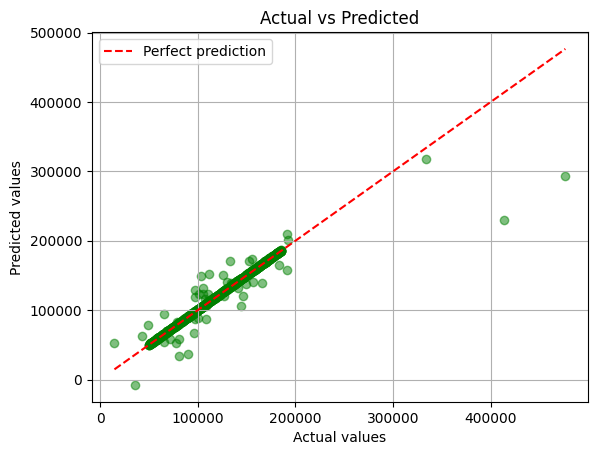

In [79]:
# After training your model and predicting:
y_pred = regressor.predict(X)

plt.scatter(y, y_pred, color='green', alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Perfect prediction')
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Actual vs Predicted")
plt.legend()
plt.grid(True)
plt.show()